## **DEMANDA Y TEMPERATURA:** VISIÓN GENERAL

#### **1) Importamos libreria útiles:**


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
maxScatter = 3000

#### **2) Cargamos datos:**

- Comprobamos que trabajamos en el directorio correcto y cargamos datos de carpeta "data":

In [3]:
dir = os.getcwd()
DIR = dir
print('Current working directory:', os.getcwd())


# Nos guardamos los datos que queremos en un dataframe usando pandas
dataframe = pd.read_csv('..\data\G02_DATOS_DEM_G1.csv', sep=',', verbose=True)
dataframe

Current working directory: c:\Users\serov\Documents\GitHub\TRABAJO-1-ESTADISTICA-DESCRIPTIVA\notebooks
Tokenization took: 0.99 ms
Type conversion took: 2.00 ms
Parser memory cleanup took: 0.00 ms


,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,01/01/2014,695.150000,14.500000,4.900000,1,2014,1,1,4
1,02/01/2014,848.520000,17.900000,8.300000,0,2014,1,2,5
2,03/01/2014,842.250000,18.000000,10.800000,0,2014,1,3,6
3,04/01/2014,790.870000,14.800000,9.900000,0,2014,1,4,7
4,05/01/2014,765.880000,15.500000,8.300000,0,2014,1,5,1
...,...,...,...,...,...,...,...,...,...
2950,29/01/2022,897.963540,14.928054,7.128469,0,2022,1,29,7
2951,30/01/2022,883.656025,14.921389,7.131950,0,2022,1,30,1
2952,31/01/2022,1016.937007,14.914723,7.135431,0,2022,1,31,2
2953,01/02/2022,1014.929731,14.908058,7.138912,0,2022,2,1,3


- Por conveniencias de código formateamos las fechas a "datetime":

In [4]:
dataframe.FECHA = pd.to_datetime(dataframe.FECHA, format='%d/%m/%Y')
# detectar valores NAN
print(dataframe.isnull().values.any())
# quitar repetivos
dataframe.drop_duplicates()
dataframe

False


,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,4
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,5
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,6
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,7
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,1
...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,0,2022,1,29,7
2951,2022-01-30,883.656025,14.921389,7.131950,0,2022,1,30,1
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,2
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,3


    No hay duplicados, ni NAN

#### **3) Realizamos un breve análisis de estos datos:**

- Primero veamos qué tipo de variables nos podemos esperar encontrar:

In [5]:
# Para ello utilizamos la función ".dtypes" de la librería pandas
print(dataframe.dtypes)

FECHA     datetime64[ns]
DEM              float64
TMAX             float64
TMIN             float64
FEST               int64
ANNO               int64
MES                int64
DIA                int64
DIASEM             int64
dtype: object


- Describimos los datos con ".describe()"

In [6]:
# Solo describimos los datos que nos interesan más describir a primera vista.
# Por ejemplo la demanda, la temperatura máxima y la temperatura mínima.
#
# Se da el caso que todas estas comparten el mismo tipo de variable por tanto,
# podemos hacer lo siguiente:

dataframe.describe(include=[float])

,DEM,TMAX,TMIN
count,2955.000000,2955.000000,2955.000000
mean,746.765411,21.339690,13.614605
std,172.909338,5.699953,6.254456
min,419.120000,7.200000,-0.700000
25%,614.090000,16.500000,8.300000
50%,701.080000,20.700000,13.000000
75%,883.440000,26.400000,19.100000
max,1298.008083,37.000000,27.300000


#### **4) Visualicemos vagamente los datos descritos arriba:**

##### **<span style="color:gold">4.1) Violinplots:</span>**

Asimetría demandas: 0.5587064072158577
Asimetría TMAX: 0.12770673486563225
Asimetría TMIN: 0.09688999156803471


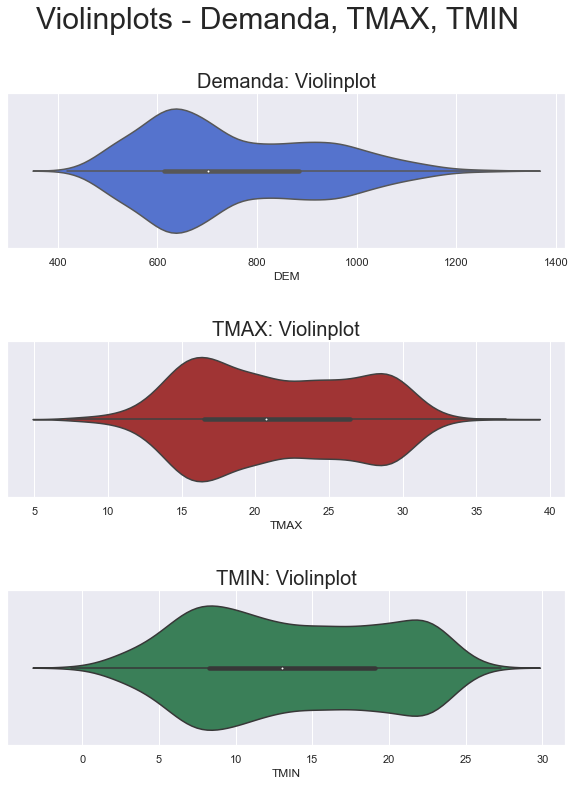

In [7]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 12))

fig.subplots_adjust(hspace = 0.6)

DEM_violinplot = sns.violinplot(x=dataframe["DEM"], 
                                color = 'royalblue',
                                ax = ax1)
TMAX_violinplot = sns.violinplot(x=dataframe["TMAX"],
                                 color= 'firebrick',
                                 ax = ax2)
TMIN_violinplot = sns.violinplot(x=dataframe["TMIN"],
                                 color= 'seagreen',
                                 ax = ax3)

plt.suptitle('Violinplots - Demanda, TMAX, TMIN', fontsize = 30)
ax1.set_title('Demanda: Violinplot', fontsize = 20)
ax2.set_title('TMAX: Violinplot', fontsize = 20)
ax3.set_title('TMIN: Violinplot', fontsize = 20)

plt.savefig('../reports/figures/Violinplots - Demanda, TMAX, TMIN.png', bbox_inches='tight')
plt.show

print('Asimetría demandas:', dataframe['DEM'].skew())
print('Asimetría TMAX:', dataframe['TMAX'].skew())
print('Asimetría TMIN:', dataframe['TMIN'].skew())

##### **<span style="color:firebrick">4.2) Boxplots:</span>**

Por ejemplo, podemos hacer un boxplot con las diversas variables (demanda, temperatura máxima, temperatura mínima), y medir su dispersión mes a mes y año a año.

- Demanda por mes:

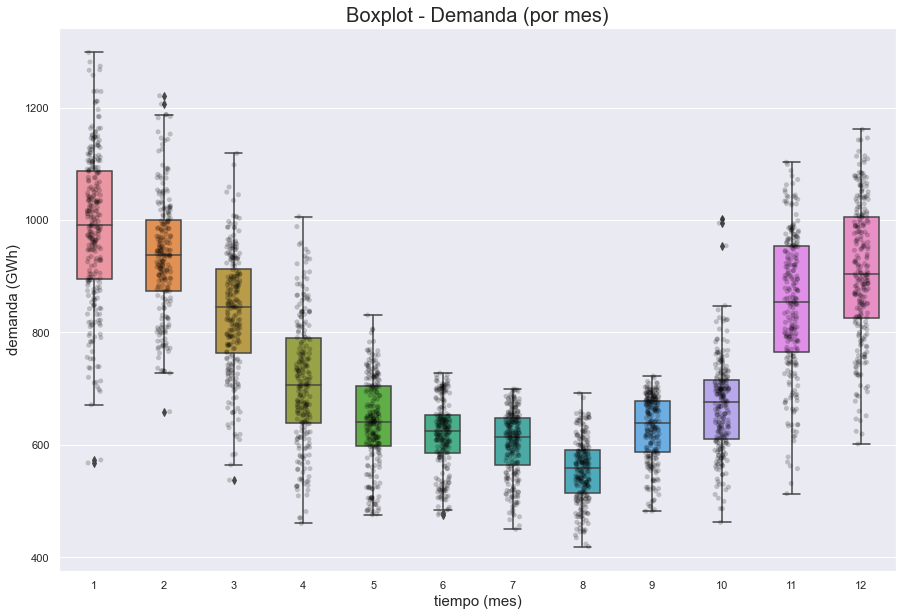

In [8]:
# DEMANDA / MES
fig = plt.figure(1, figsize=(15,10))

DEM_boxplot = sns.boxplot(y='DEM', x='MES', 
                 data=dataframe, 
                 width=0.5)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='MES', 
                       data=dataframe, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')

plt.title("Boxplot - Demanda (por mes)", fontsize = 20)
plt.xlabel("tiempo (mes)", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Demanda (por mes).png', bbox_inches='tight')
plt.show()

- Demanda por año:

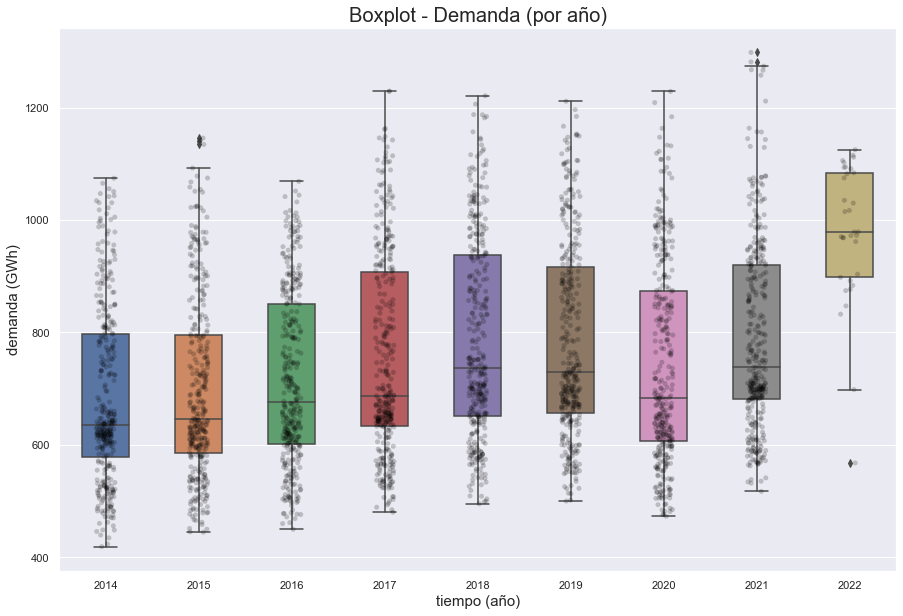

In [9]:
# DEMANDA / AÑO
fig = plt.figure(1, figsize=(15,10))

DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe, 
                 width=0.5)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')

plt.title("Boxplot - Demanda (por año)", fontsize = 20)
plt.xlabel("tiempo (año)", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Demanda (por año).png', bbox_inches='tight')
plt.show()

- Temperatura máxima por mes:

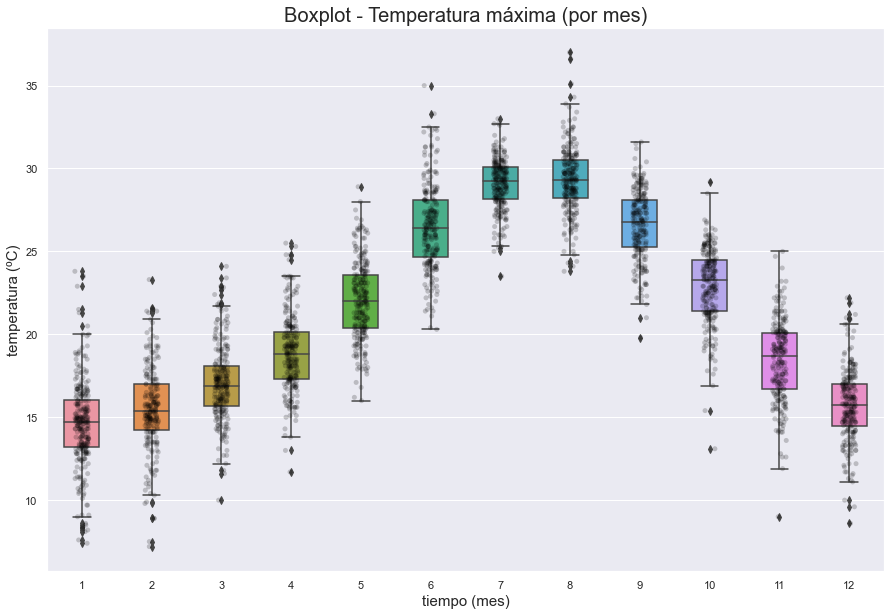

In [10]:
# TEMPERATURA MÁXIMA / MES
fig = plt.figure(2, figsize=(15,10))

DEM_boxplot = sns.boxplot(y='TMAX', x='MES', 
                 data=dataframe, 
                 width=0.5)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='MES', 
                       data=dataframe, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')

plt.title("Boxplot - Temperatura máxima (por mes)", fontsize = 20)
plt.xlabel("tiempo (mes)", fontsize = 15)
plt.ylabel("temperatura (ºC)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Temperatura máxima (por mes).png', bbox_inches='tight')
plt.show()

- Temperatura máxima por año:

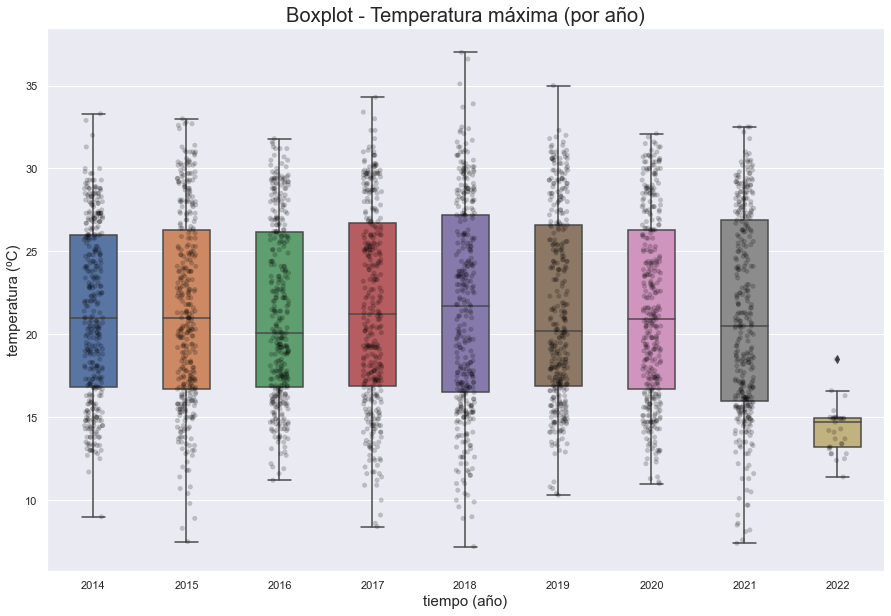

In [11]:
# TEMPERATURA MÁXIMA / AÑO
fig = plt.figure(2, figsize=(15,10))

DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe, 
                 width=0.5)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')

plt.title("Boxplot - Temperatura máxima (por año)", fontsize = 20)
plt.xlabel("tiempo (año)", fontsize = 15)
plt.ylabel("temperatura (ºC)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Temperatura máxima (por año).png', bbox_inches='tight')
plt.show()

- Temperatura mínima por mes:

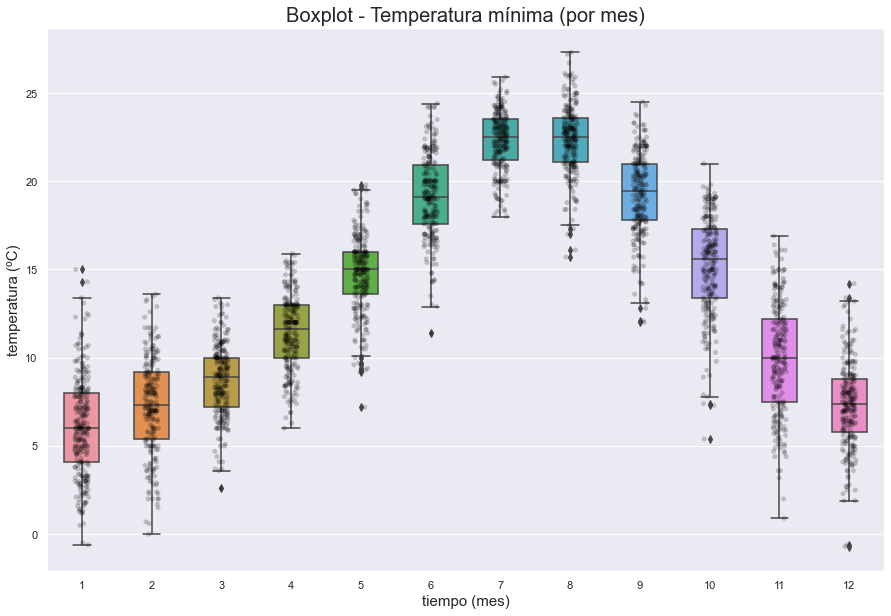

In [12]:
# TEMPERATURA MÍNIMA / MES
fig = plt.figure(3, figsize=(15,10))

DEM_boxplot = sns.boxplot(y='TMIN', x='MES', 
                 data=dataframe, 
                 width=0.5)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='MES', 
                       data=dataframe, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')

plt.title("Boxplot - Temperatura mínima (por mes)", fontsize = 20)
plt.xlabel("tiempo (mes)", fontsize = 15)
plt.ylabel("temperatura (ºC)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Temperatura mínima (por mes).png', bbox_inches='tight')
plt.show()

- Temperatura mínima por año:

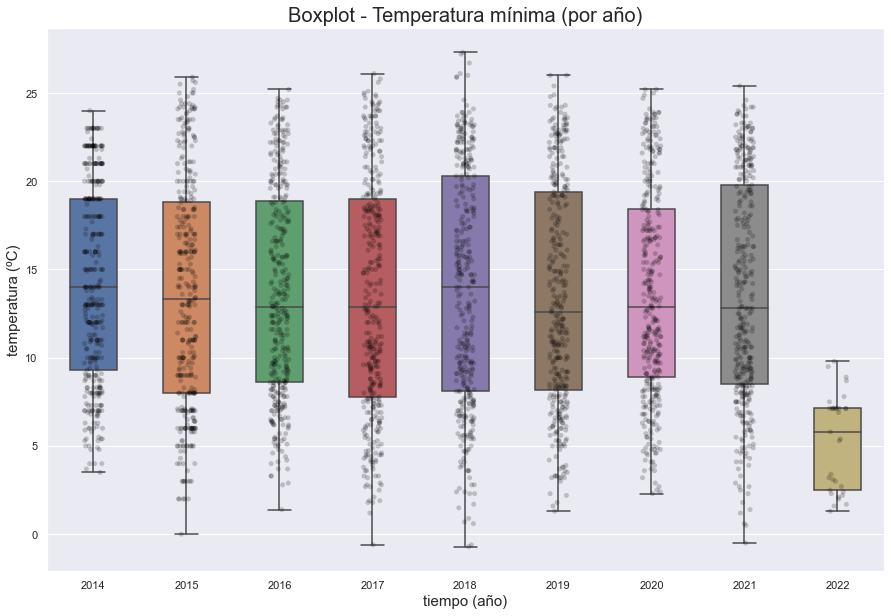

In [13]:
# TEMPERATURA MÍNIMA / AÑO
fig = plt.figure(2, figsize=(15,10))

DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe, 
                 width=0.5)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')

plt.title("Boxplot - Temperatura mínima (por año)", fontsize = 20)
plt.xlabel("tiempo (año)", fontsize = 15)
plt.ylabel("temperatura (ºC)", fontsize = 15)
plt.savefig('../reports/figures/Boxplot - Temperatura mínima (por año).png', bbox_inches='tight')
plt.show()

##### **<span style="color:seagreen">4.3) Evolución temporal (años):</span>**

También podemos ver en lineas generales cómo estas variables varían a lo largo de todos los años. 

- Temperaturas a lo largo de todos los años:

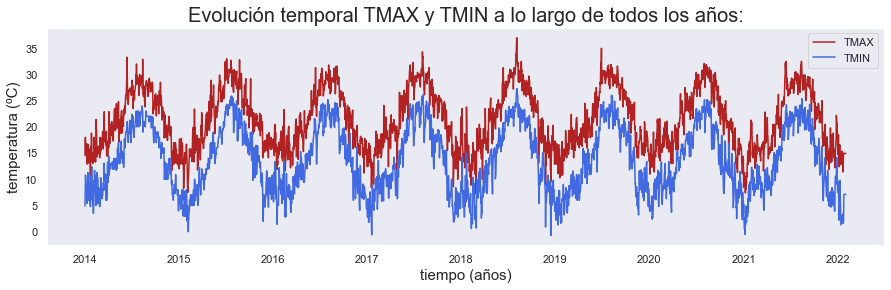

In [14]:
fig = plt.figure(4, figsize=(15, 4)) 

plt.plot(dataframe['FECHA'], dataframe['TMAX'], label = 'TMAX', color = 'firebrick')
plt.plot(dataframe['FECHA'], dataframe['TMIN'], label = 'TMIN', color = 'royalblue')

plt.title("Evolución temporal TMAX y TMIN a lo largo de todos los años:", fontsize = 20)
plt.xlabel("tiempo (años)", fontsize = 15)
plt.ylabel("temperatura (ºC)", fontsize = 15)
plt.legend()
plt.grid()
plt.savefig('../reports/figures/Evolución temporal TMAX y TMIN a lo largo de todos los años.png', bbox_inches='tight')
plt.show()

- Demanda a lo largo de todos los años:

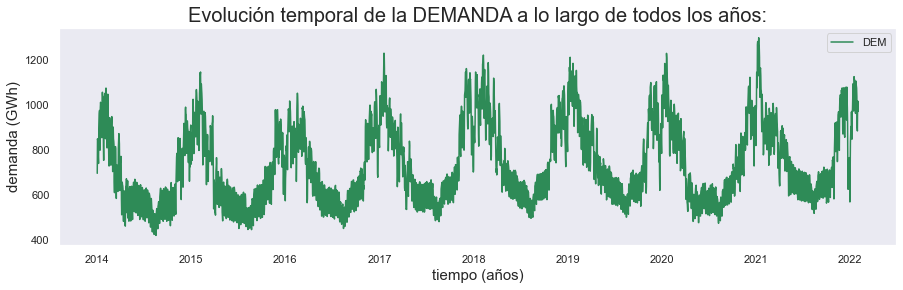

In [15]:
fig = plt.figure(5, figsize=(15, 4)) 

plt.plot(dataframe['FECHA'], dataframe['DEM'], label = 'DEM', color = 'seagreen')

plt.title("Evolución temporal de la DEMANDA a lo largo de todos los años:", fontsize = 20)
plt.xlabel("tiempo (años)", fontsize = 15)
plt.ylabel("demanda (GWh)", fontsize = 15)
plt.legend()
plt.grid()
plt.savefig('../reports/figures/Evolución temporal de la DEMANDA a lo largo de todos los años.png', bbox_inches='tight')
plt.show()

    NOTA: En invierno de 2022 la demanda cae drásticamente. En 2021 alcanza un pico.

- Incremento demanda diaria:

In [43]:
incremento = dataframe['DEM'][1:]/dataframe['DEM'][:-1].values-1
incremento

1       0.220629
2      -0.007389
3      -0.061003
4      -0.031598
5      -0.034927
          ...   
2950   -0.132406
2951   -0.015933
2952    0.150829
2953   -0.001974
2954   -0.044011
Name: DEM, Length: 2954, dtype: float64

In [44]:
incremento.mean()

0.004804546322608237

##### **<span style="color:royalblue">4.4) Correlación entre variables:</span>**

Queremos ver si existe algún tipo de correlación entre estas variables (entre sí).

In [45]:
# Nos creamos un dataframe nuevo con las variables de nuestro interés
dataframe_DEM_TMAX_TMIN = dataframe[['DEM', 'TMAX', 'TMIN']]

C:\Users\serov\AppData\Local\Temp\ipykernel_28024\2788895756.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


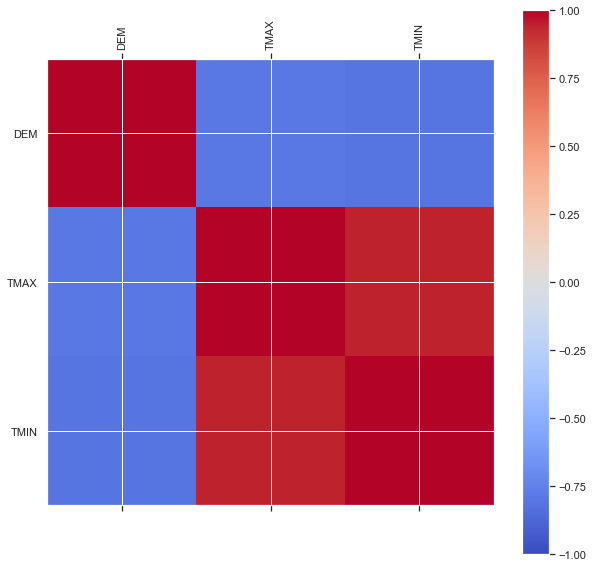

           DEM      TMAX      TMIN
DEM   1.000000 -0.796528 -0.807733
TMAX -0.796528  1.000000  0.944681
TMIN -0.807733  0.944681  1.000000


In [46]:
# Calculamos la matriz de correlación:
corr = dataframe_DEM_TMAX_TMIN.corr()

# Gráficamente
fig = plt.figure(6, figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataframe_DEM_TMAX_TMIN.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe_DEM_TMAX_TMIN.columns)
ax.set_yticklabels(dataframe_DEM_TMAX_TMIN.columns)
plt.savefig('../reports/figures/Correlación entre variables.png', bbox_inches='tight')
plt.show()

# Numéricamente
print(corr)

    NOTA: Es evidente por este gráfico que existe una correlación bastante fuerte entre estas variables.